<a href="https://colab.research.google.com/github/al34n1x/DataScience/blob/master/3.Pandas/Pandas_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>[Pandas](#scrollTo=75YpFVg5xBXX)

>>[Series](#scrollTo=Ew9sUZAZzHP4)

>>[DataFrame](#scrollTo=YEQGk9px4hmx)

>>[Index Objects](#scrollTo=Ra_OstUXzEiX)

>>[Funciones Esenciales](#scrollTo=tR9M_vw90NXX)

>>>[Reindexing](#scrollTo=UFQSAmC10i67)

>>>[Eliminar entradas de un eje](#scrollTo=N7PAv1RF3pID)

>>>[Indización, selección y filtrado](#scrollTo=K0kS9vX9NX-6)

>>>[Selección con Loc e ILoc](#scrollTo=rgeVibG1PEZ2)

>>>[Índices enteros](#scrollTo=S1-aECmuQC6u)

>>>[Aritmética y alineación de datos](#scrollTo=6F9oujCWRQ6M)

>>[Métodos Aritméticos con Valores de llenado](#scrollTo=dMEm_UPhS9UI)

>>>[Aplicación de funciones y mapeo](#scrollTo=Vp2uNDZcT93w)

>>>[Ordenamiento y clasificación](#scrollTo=zG1wRBBbVCdN)

>>[Resumiendo y calculando estadísticas descriptivas](#scrollTo=epZ41KN4aGBv)

>>[Carga de datos, almacenamiento y formatos de archivo](#scrollTo=VnS0BgULfeCf)

>>[Ejemplo utilizando pandas_datareader](#scrollTo=K73jnvDWe5Qo)



#Pandas


Pandas será una herramienta importante durante gran parte del resto de la cursada. Contiene estructuras y herramientas de manipulación de datos diseñadas para hacer que la limpieza y el análisis de datos sean rápidos y fáciles en Python. Pandas a menudo se usa en conjunto con herramientas de cómputo numérico como **NumPy** y **SciPy**, bibliotecas analíticas como **statsmodels** y **scikit-learn**, y bibliotecas de visualización de datos como **matplotlib**. Pandas adopta partes significativas de nomenclaturas utilizadas con NumPy, especialmente funciones basadas en arreglos y la facilidad de procesamiento de datos sin bucles.

Mientras que Pandas adopta muchos modismos de codificación de NumPy, la mayor diferencia es que Panda está diseñado para trabajar con datos tabulares o heterogéneos. NumPy, por el contrario, es más adecuado para trabajar con datos de matriz numérica homogénea.

![](https://i.pinimg.com/originals/4e/64/5f/4e645ff4125038aa70f156918323ecb1.jpg)



Para comenzar con Pandas, deberás sentirse cómodo con sus dos estructuras de datos más importantes: **Series** y **DataFrame**. Si bien no son una solución universal para cada problema, proporcionan una base sólida y fácil de usar para la mayoría de las aplicaciones que iremos trabajando.

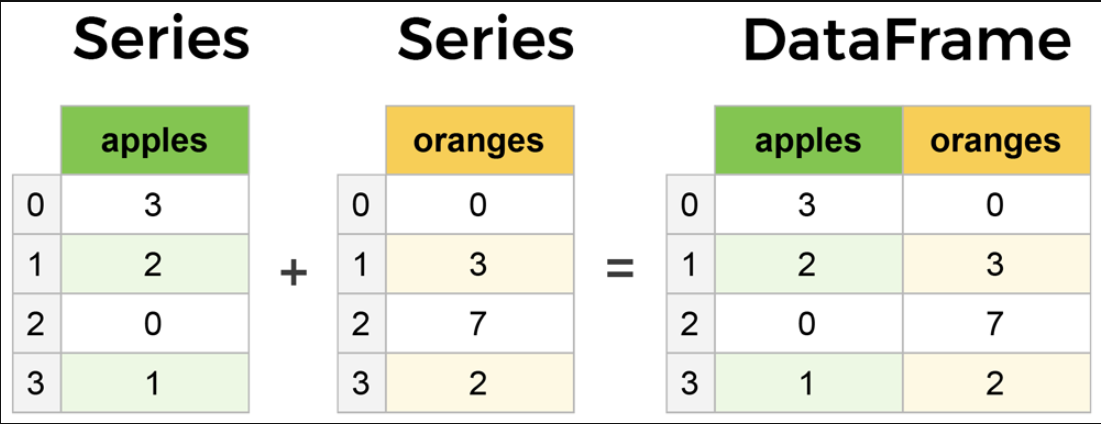


## Series

Una serie es un objeto matriz unidimensional que puede almacenar cualquier tivo de datos *(int,strings,numbers,etc)* y una matriz asociada de etiquetas de datos, denominada **índice**. La serie más simple está formada solo por una matriz de datos:



In [ ]:
import pandas as pd
from pandas import Series, DataFrame
obj = pd.Series([4, 7, -5, 3])
obj

En algunas circunstancias es posible que desees crear tus propios labels para los índices, puedes hacerlo de la siguiente forma.


In [ ]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c']) # Le agregamos los labels de los índices. El orden se mantiene 1:1
obj2

Ahora bien, para que puedo utilizar ese índice? A diferencia de NumPy puedo utilizarlos para referenciar a un valor o un set de valores

In [ ]:
obj2['a']

Usar funciones o operaciones aritméticas como filtrado, multiplicaciones de escalares o arreglos de booleans, perseverá el valor del índice


In [ ]:
obj2[obj2 > 0]

In [ ]:
obj2 * 2

In [ ]:
obj2

Otra forma de pensar en series podría ser un diccionario de longitud fija, que mapea índices con valores. Puede ser utilizado en muchos contextos.


In [ ]:
sdata = {'Buenos Aires': 35000, 
         'Santa Fe': 71000, 
         'Mendoza': 16000, 
         'Córdoba': 5000}
obj3 = pd.Series(sdata)
obj3

In [ ]:
provincias = ['Tucumán', 'Buenos Aires', 'Santa Fe', 'Mendoza']
obj4 = pd.Series(sdata, index=provincias)
obj4

Como recuerdan en Python todo se comporta como objetos, y series no son las excepciones. Las series poseen un índice y atributos de nombre, los cuales pueden ser utilizados con otras herramientas de Panda.


In [ ]:
obj4.name = 'Población'
obj4.index.name = 'Provincias Argentinas'
obj4


Puedes enviar un diccionario o lista como parámetro y Pandas se encargará de convertirlo al tipo de objeto series, y viceversa.

In [ ]:
pdict_1 = {
    'car1': 'Honda',
    'car2': 'Toyota',
    'car3': 'Ford',
    'car4': 'GM',
    'car5': 'BMW',
    'car6': 'Nissan'
  }  

pdict_1

In [ ]:
pseries = pd.Series(pdict_1)
pseries

In [ ]:
pdict_from_series = dict(pseries) #Invoco la función diccionario y le paso como parámetro la serie. Se puede realizar lo mismo con Listas
pdict_from_series


## DataFrame

Un DataFrame representa una tabla rectangular de datos que contiene una colección ordenadas de columnas, cuales pueden ser de diferente tipo de valor (númerico, cadenas, booleanos, etc). El DataFrame tiene un índice para las filas y otro para las columnas. Destrás de escena, lo que sucede es que los datos son almacenados como uno o mas bloques de datos de dos dimensiones.


In [ ]:
data = {'provincia': ['Buenos Aires', 'Buenos Aires', 'Buenos Aires', 'Córdoba', 'Córdoba', 'Córdoba'],
        'año': [2000, 2001, 2002, 2001, 2002, 2003],
        'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

Si te encontras trabajando con grandes datasets, el método **head** selecciona las primeras 5 filas del mismo.


In [ ]:
frame.head()

Se puede especificar el orden de las columnas

In [ ]:
pd.DataFrame(data, columns=['año', 'provincia', 'pob']) 

Que pasará si enviamos una columna que no posee datos en el DataSet?

In [ ]:
frame2 = pd.DataFrame(data, columns=['año', 'provincia', 'pob', 'deuda'], 
                      index=['uno', 'dos', 'tres', 'cuatro','cinco', 'seis'])
frame2

También podemos obtener información de un Dataset como una serie

In [ ]:
frame2['provincia'] # Le pasamos como parámetro la columna que deseamos visualizar

Filas también pueden ser obtenidas por posición mediante el atributo especial **loc**

In [ ]:
frame2.loc['tres'] # Como hacemos para obtener la tercera fila del dataframe?

Las columnas pueden ser modificadas por asignación. Por ejemplo, tomemos la columna vacía **Deuda**, podríamos asignar un escalar o un arreglo de valores:


In [ ]:
import numpy as np
frame2['deuda'] = np.arange(6.) # Que hace está función? 
frame2

Si asignas arreglos a columnas, la longitud del mismo debe ser igual que al del DataFrame. Los labels serán reasignados exactamente al índice del DF, insertando NaN en los valores faltantes.


In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=['dos', 'cuatro', 'cinco'])
frame2['deuda'] = val
frame2

Al declarar columnas que no existen, estás se agregarán de acuerdo al ordenamiento establecido.

In [ ]:
frame2['Región Centro'] = frame2.provincia == 'Córdoba'
frame2

Podemos borrar columnas usando el método **del**

In [ ]:
frame2.columns

In [ ]:
del frame2['Región Centro']

In [ ]:
frame2.columns

Otro tipo común de declarar datos es mediante diccionarios anidados


In [ ]:
pob = {'Rosario': {2001: 2.4, 2002: 2.9},
        'Mendoza': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pob)
frame3

Puedes transponer el DataFrame (Intercambiar columnas y filas) con una sintaxis similar a NumPy:


In [ ]:
frame3.T

## Index Objects

Los objetos índices son responsables de almacenar las etiquetas de los ejes y otros metadatos. Los arreglos o otra secuencia de etiquetas que utilizas cuando construyes una serie o un DataFrame es internamente convertido a un índice:


In [ ]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
print (obj)
print (index)
index[1:]

In [ ]:
index[1] = 'd' #Que sucede si ejecutamos la siguiente línea?

## Funciones Esenciales

La siguiente sección provee los fundamentos básicos para interactuar con datos contenidos en una serie o un DataFrame. 

### Reindexing

Un importante método en Pandas es la reindexación. Esto crea un nuevo objeto que se encuentra conformado por un nuevo índice. Llamar al reindex en la serie re-arregla los datos de acuerdo al nuevo índice introduciendo NaN en aquellos valores que no se encuentran presentes.
Por ejemplo:


In [ ]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

Para datos ordenados como series de tiempo, puede ser deseable hacer alguna interpolación o relleno de valores al reindexar. Podemos hacerlo usando el método como **ffill**, que reenvía los valores:

In [ ]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3

In [ ]:
obj3.reindex(range(6), method='ffill')

Con DataFrame, reindex puede alterar el índice (fila), las columnas o ambos. Cuando se pasa solo una secuencia, reindexa las filas en el resultado:

In [ ]:
import numpy as np
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
        index=['a', 'c', 'd'],
        columns=['Buenos Aires', 'Córdoba', 'Rosario'])
frame

In [ ]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

### Eliminar entradas de un eje
Eliminar una o más entradas de un eje es fácil si ya tiene una matriz de índice o una lista sin esas entradas. Como eso puede requerir un poco de **munging** y establecer la lógica, el método **drop** devolverá un nuevo objeto con el valor o valores indicados eliminados de un eje:

In [ ]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
new_obj = obj.drop('c')
new_obj

Con DataFrame, los valores de índice se pueden eliminar de cualquier eje. Para ilustrar esto, primero creemos un DataFrame de ejemplo:

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
      index=['Deadpool', 'Spidy', 'Wolverine', 'Dopinder'],
      columns=['uno', 'dos', 'tres', 'cuatro'])
data

In [ ]:
data.drop(['Spidy', 'Dopinder'])

In [ ]:
data

### indexación, selección y filtrado
La indexación en serie (obj [...]) funciona de manera análoga a la indexación de arreglos de NumPy, excepto que puede usar los valores de índice de la serie en lugar de solo enteros. Aquí hay algunos ejemplos de esto:

In [ ]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

In [ ]:
obj['b']

In [ ]:
obj[2:]

El slicing con etiquetas se comporta de manera diferente al equivalente en Python en que el punto final es inclusivo

In [ ]:
obj['b':'c']

### Selección con Loc e ILoc

Para la indexación de etiquetas de DataFrame en las filas, se presentan los operadores de indexación especiales **loc** e **iloc**. Estos operadores permiten seleccionar un subconjunto de las filas y columnas de un DataFrame con notación tipo NumPy usando etiquetas de eje (loc) o enteros (iloc).

In [ ]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
      index=['Deadpool', 'Spidy', 'Wolverine', 'Dopinder'],
      columns=['uno', 'dos', 'tres', 'cuatro'])

data

In [ ]:
data.loc['Spidy', ['uno', 'dos']] # [Filas, Columnas]

Pdemos realizar algunas selecciones similares con enteros usando iloc:

In [ ]:
data.iloc[2, [3, 0, 1]]

### Índices enteros
Trabajar con objetos Pandas indexados por enteros es algo que a menudo confunde a nuevos usuarios debido a algunas diferencias con la semántica de indexación en estructuras de datos Python incorporadas como listas y tuplas. Por ejemplo, es posible que el siguiente código genere un error:

In [ ]:
ser = pd.Series(np.arange(3.))
ser

In [ ]:
ser[-1]

Si usamos non-Integer Index, no hay problemas de ambigüedad

In [ ]:
ser2 = pd.Series(np.arange(3.), index=['a', 'b', 'c']) 
ser2[-1]

In [ ]:
ser2['c']

Para mantener las cosas consistentes, si tiene un índice de eje que contiene enteros, la selección de datos siempre estará orientada a las etiquetas. Para un manejo más preciso, use **loc** (para etiquetas) o **iloc** (para enteros):

### Aritmética y alineación de datos
Una característica importante de Pandas para algunas aplicaciones es el comportamiento de la aritmética entre objetos con diferentes índices. Cuando agrega objetos juntos, si alguno de los pares de índice no es el mismo, el índice respectivo en el resultado será la unión de los pares de índice. 
La alineación interna de datos introduce valores faltantes en las ubicaciones de las etiquetas que no se superponen. Los valores faltantes se propagarán en cálculos aritméticos adicionales.
Veamos un ejemplo:

In [ ]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

In [ ]:
print (s1)
print ('\n')
print (s2)

In [ ]:
s1 + s2

En el caso de DataFrame, la alineación se realiza tanto en las filas como en las columnas:

In [ ]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
          index=['Buenos Aires', 'Córdoba', 'Rosario'])

df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
          index=['Buenos Aires', 'Córdoba', 'Rosario', 'Mendoza'])

In [ ]:
print (df1)
print ('\n')
print (df2)

In [ ]:
df1 + df2

## Métodos Aritméticos con Valores de llenado 
En operaciones aritméticas entre objetos indexados de manera diferente, es posible que desees rellenar con un valor especial, como 0, para evitar valores nulos:

In [ ]:
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
          columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
          columns=list('abcde'))


In [ ]:
print (df1)
print (df2)

In [ ]:
df2.loc[1, 'b'] = np.nan

In [ ]:
print (df1)
print ('\n')
print (df2)

In [ ]:
df1 + df2

Usando el método **add** en df1, paso df2 y un argumento para fill_value:

In [ ]:
df1.add(df2, fill_value=0) 

### Aplicación de funciones y mapeo
**NumPy ufuncs** (métodos de matriz de elementos) también funcionan con objetos pandas:

In [ ]:
frame = pd.DataFrame(np.random.randn(4, 3), 
                     columns=list('bde'),
                     index=['Buenos Aires', 'Córdoba', 'Rosario', 'Mendoza'])
frame

In [ ]:
np.abs(frame)

Otra operación frecuente es aplicar una función en matrices unidimensionales a cada columna o fila. El método de **apply** de DataFrame hace exactamente esto:

In [ ]:
def f(x):
        return pd.Series([x.min(), x.max()], index=['min', 'max'])

In [ ]:
frame

In [ ]:
frame.apply(f)

### Ordenamiento y clasificación
Ordenar un conjunto de datos por algún criterio es otra operación incorporada importante. Para ordenar lexicográficamente por índice de fila o columna, use el método **sort_index**, que devuelve un nuevo objeto ordenado:

In [ ]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()

In [ ]:
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['uno', 'tres'],
                     columns=['d', 'a', 'b', 'c'])
frame.sort_index()

Al ordenar un DataFrame, puede usar los datos en una o más columnas como las claves de clasificación. Para hacerlo, pase uno o más nombres de columna a la opción by de **sort_values**:

In [ ]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 
                      'a': [0, 1, 0, 1]})
frame

In [ ]:
frame.sort_values(by='b')

In [ ]:
frame.sort_values(by=['a', 'b']) # Ordena por multiples columnas

La clasificación asigna rangos desde uno hasta el número de puntos de datos válidos en una matriz. Los métodos de clasificación para Series y DataFrame son el lugar para buscar; Por defecto, el rango rompe los lazos asignando a cada grupo el rango medio:

In [ ]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 
                      'a': [0, 1, 0, 1],
                      'c': [-2, 5, 8, -2.5]})

frame

In [ ]:
frame.rank(axis='columns',ascending=False)

In [ ]:
frame.rank(axis='rows')

## Resumiendo y calculando estadísticas descriptivas
Los objetos pandas están equipados con un conjunto de métodos matemáticos y estadísticos comunes. 
La mayoría de estos pertenecen a la categoría de reducciones o estadísticas resumidas, métodos que extraen un solo valor de una Serie o una Serie de valores de las filas o columnas de un Marco de datos. En comparación con los métodos similares que se encuentran en los arreglos NumPy, tienen un manejo incorporado para los datos faltantes. Consideremos un pequeño DataFrame:

In [ ]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                    [np.nan, np.nan], [0.75, -1.3]],
                    index=['a', 'b', 'c', 'd'],
                    columns=['one', 'two'])
df

In [ ]:
df.sum()

In [ ]:
df.sum(axis='columns')

## Carga de datos, almacenamiento y formatos de archivo

La entrada y salida generalmente se clasifican en algunas categorías principales: leer archivos de texto y otros formatos en disco más eficientes, cargar datos de bases de datos e interactuar con fuentes de red como API web.

In [ ]:
df = pd.read_csv('./sample_data/california_housing_train.csv')
df.head()

El manejo de valores perdidos es una parte importante y frecuentemente matizada del proceso de análisis de archivos. Los datos que faltan generalmente no están presentes o están marcados por algún valor de referencia. Por defecto, los pandas usan un conjunto de centinelas comunes, como NA y NULL:

In [ ]:
pd.isnull(df)

Se pueden especificar diferentes referencia de NA para cada columna en un diccionario:

In [ ]:
referencia_nulos = {'housing_median_age': ['foo', 'NA'], 
                    'total_rooms': ['NA']}
df = pd.read_csv('./sample_data/california_housing_train.csv', na_values=referencia_nulos)
df

## Ejemplo utilizando pandas_datareader

En el siguiente ejemplo usaremos el módulo de pandas_datareader para descargar datos de algunos índices accionarios.



In [ ]:
#!pip install yfinance -U
#!pip install --upgrade pandas-datareader
#!pip install --upgrade pandas

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import yfinance
yfinance.pdr_override()


all_datda = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}

price = pd.DataFrame({ticker: data['Close']
                    for ticker, data in all_data.items()})

volume = pd.DataFrame({ticker: data['Volume']
                      for ticker, data in all_data.items()})


returns = price.pct_change() # Aplicamos la funcion cambio porcentual al precio de las acciones
returns.tail() # retornamos los últimos valores del dataframe

In [ ]:
all_data

In [ ]:
price.tail()

In [ ]:
volume.tail()

In [ ]:
price.max()